## Load the Data

In [63]:
import pandas as pd 
import os

# function to load data
def load_data(data_path, file_name):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path, low_memory=False)

ocean = load_data("data", "Data_Level5_BAH_OceanCleanup.csv")
ocean.head()

,Cleanup ID,Zone,State,Country,GPS,Cleanup Type,Cleanup Date,Group Name,Adults,Children,...,Other Trash (Clean Swell),Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected
0,86,"Cuyahoga County, OH, USA","Ohio, USA",United States,"41.49742, -81.56505","Land (beach, shoreline and inland)",12/22/2014,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,0,3.0
1,87,"Fairfax County, VA, USA","Virginia, USA",United States,"38.87456, -77.24428","Land (beach, shoreline and inland)",12/24/2014,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,2,10.0
2,92,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.04405","Land (beach, shoreline and inland)",2/19/2015,NaN,1.0,0.0,...,1,0,0,0,0,0,0,0,0,4.0
3,93,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.0441","Land (beach, shoreline and inland)",2/19/2015,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,0,14.0
4,94,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.0441","Land (beach, shoreline and inland)",2/19/2015,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,0,14.0


In [64]:
ocean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37904 entries, 0 to 37903
Data columns (total 61 columns):
Cleanup ID                                   37904 non-null object
Zone                                         37665 non-null object
State                                        37577 non-null object
Country                                      37903 non-null object
GPS                                          37903 non-null object
Cleanup Type                                 37903 non-null object
Cleanup Date                                 37903 non-null object
Group Name                                   26636 non-null object
Adults                                       37903 non-null float64
Children                                     37903 non-null float64
People                                       37903 non-null float64
Pounds                                       37903 non-null float64
Miles                                        37903 non-null float64
# of bags      

## Discover the Data

In [65]:
ocean.describe()

,Adults,Children,People,Pounds,Miles,# of bags,Cigarette Butts,"Food Wrappers (candy, chips, etc.)",Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),...,Other Trash (Clean Swell),Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected
count,37903.000000,37903.000000,37903.000000,37903.000000,37903.000000,37903.000000,3.790400e+04,3.790400e+04,37904.000000,37904.000000,...,37904.000000,37904.000000,37904.000000,37904.000000,37904.000000,37904.000000,3.790400e+04,37904.000000,3.790400e+04,37903.000000
mean,16.621481,2.452814,19.074295,310.799010,1.426367,7.360103,1.749690e+02,6.619354e+01,11.831838,8.680614,...,18.597932,0.808727,0.761344,0.598459,1.355266,2.137822,1.737178e+02,28.649694,1.579318e+02,502.647284
std,200.761902,18.684501,203.218661,4621.795387,15.329109,157.094929,1.704443e+04,6.445898e+03,1153.418164,846.008907,...,1810.697419,78.887605,74.457778,58.585591,132.347617,208.136822,1.719248e+04,2792.134959,1.539350e+04,4060.754999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1.000000,0.000000,1.000000,1.450000,0.027500,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,19.000000
50%,2.000000,0.000000,2.000000,5.600000,0.341700,0.000000,4.000000e+00,5.000000e+00,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,8.000000e+00,84.000000
75%,6.000000,0.000000,7.000000,24.000000,1.105100,0.000000,3.000000e+01,1.900000e+01,3.000000,2.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,4.300000e+01,264.000000
max,22060.000000,1291.000000,22060.000000,425025.000000,2423.166700,18581.000000,3.316012e+06,1.254500e+06,224237.000000,164515.000000,...,352468.000000,15327.000000,14429.000000,11342.000000,25685.000000,40516.000000,3.292299e+06,542969.000000,2.993124e+06,440496.000000


Take a look at categorical data:

In [80]:
ocean['Zone'].value_counts()

Los Angeles County, CA, USA    2499
Palm Beach County, FL, USA     2218
San Diego County, CA, USA      1852
Pinellas County, FL, USA       1757
Miami-Dade County, FL, USA     1650
                               ... 
Botetourt County, VA, USA         1
Kings Park, NY 11754, USA         1
Boyd County, KY, USA              1
McLeod County, MN, USA            1
Wharton County, TX, USA           1
Name: Zone, Length: 900, dtype: int64

In [81]:
ocean['State'].value_counts()

Florida, USA                 11319
California, USA               9271
North Carolina, USA           1800
Washington, USA               1233
New York, USA                 1179
South Carolina, USA           1168
Texas, USA                    1070
Virginia, USA                 1068
Oregon, USA                    936
Hawaii, USA                    749
Massachusetts, USA             616
Pennsylvania, USA              596
Rhode Island, USA              499
Ohio, USA                      499
Illinois, USA                  482
New Jersey, USA                472
Maryland, USA                  467
Michigan, USA                  442
Connecticut, USA               407
Maine, USA                     398
District of Columbia, USA      371
Louisiana, USA                 363
Georgia, USA                   345
Delaware, USA                  331
Wisconsin, USA                 297
Alabama, USA                   197
Alaska, USA                    163
Colorado, USA                  132
New Hampshire, USA  

In [83]:
ocean['Country'].value_counts()

United States    37903
Name: Country, dtype: int64

In [84]:
ocean['Cleanup Type'].value_counts()

Land (beach, shoreline and inland)                  37116
Watercraft (powerboat, sailboat, kayak or canoe)      571
Underwater                                            216
Name: Cleanup Type, dtype: int64

In [85]:
ocean['Group Name'].value_counts()

SOLVE                             666
Sea Turtle Trackers               372
EBSP Turtle Patrol                371
Sea turtle trackers               356
I am Green eco servicesc gno v    186
                                 ... 
USF EWB                             1
Silver Lake Nature Center           1
Bw-iccd                             1
Salty Brine - Save The Bay          1
Gdrt                                1
Name: Group Name, Length: 12973, dtype: int64

Look at corelations between data:

In [97]:
corr_matrix = ocean.corr()
corr_matrix['Adults'].sort_values(ascending=False)

Adults                                       1.000000
People                                       0.995796
Pounds                                       0.516815
# of bags                                    0.425434
Miles                                        0.313681
Beverage Bottles (Glass)                     0.304049
Beverage Bottles (Plastic)                   0.275337
Tobacco Packaging/Wrap                       0.273976
Cups, Plates (Plastic)                       0.263692
Cups, Plates (Foam)                          0.250310
Condoms                                      0.247985
Grocery Bags (Plastic)                       0.245610
Take Out/Away Containers (Foam)              0.243282
Other Plastic/Foam Packaging                 0.227070
Cigarette Butts                              0.214951
Cups, Plates (Paper)                         0.214880
Cigarette Lighters                           0.203176
Forks, Knives, Spoons                        0.203024
Tires                       

In [86]:
import numpy as np

ocean[['gps_y','gps_x']] = ocean.GPS.str.split(expand=True)
ocean[['gps_y']] = ocean['gps_y'].str.slice(0, -1)
ocean[['gps_y', 'gps_x']] = ocean[['gps_y', 'gps_x']].astype('float')
ocean.head(1)

,Cleanup ID,Zone,State,Country,GPS,Cleanup Type,Cleanup Date,Group Name,Adults,Children,...,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected,gps_y,gps_x
0,86,"Cuyahoga County, OH, USA","Ohio, USA",United States,"41.49742, -81.56505","Land (beach, shoreline and inland)",12/22/2014,NaN,1.0,0.0,...,0,0,0,0,0,0,0,3.0,41.49742,-81.56505


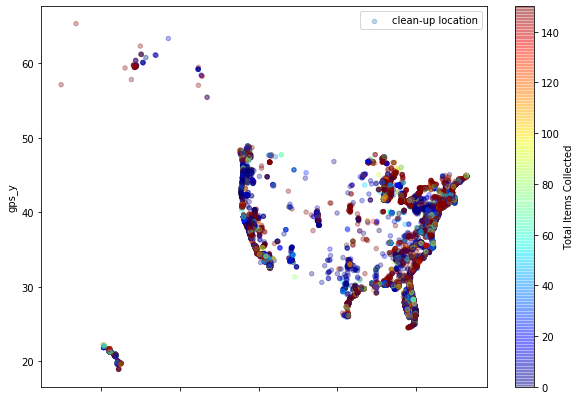

In [75]:
# plot within jupyter
%matplotlib inline 
import matplotlib.pyplot as plt

ocean.plot(kind="scatter", x="gps_x", y="gps_y", alpha=0.3,
            label="clean-up location", figsize=(10,7),
            c="Total Items Collected", cmap=plt.get_cmap("jet"), colorbar=True, vmax=150)
plt.legend()

## Interactive Map

In [123]:
# take out 'usa' from state information
ocean[['State']] = ocean['State'].str.slice(0, -5)

In [137]:
ocean.dropna(subset=['gps_x'], inplace=True)
ocean.dropna(subset=['gps_y'], inplace=True)

In [175]:
# import the library
import folium
import pandas as pd
 
# Make an empty map, cartodbdark_matter , stamenterrain
map_ = folium.Map(location=[48, -102],
                  tiles="cartodbdark_matter", 
                  zoom_start=3)
 

# I can add marker one by one on the map
for i in range(0,len(ocean)):
    if i == 1000:
        break
    folium.Circle(
      location=[ocean.iloc[i]['gps_y'], ocean.iloc[i]['gps_x']],
      popup=ocean.iloc[i]['Cleanup Type'],
      radius=ocean.iloc[i]['Pounds']*5000,
      color='crimson',
      fill=True,
      fillOpacit= 0.5,
      weight=0.1,
      fill_color='crimson'
   ).add_to(map_)


# Save it as html
map_